In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from xgboost.sklearn import XGBClassifier
import seaborn as sns

In [2]:
"""=====CONSTANTS====="""
TEST_SIZE = 0.2

Поглядим на данные

In [3]:
data_df = pd.read_csv('heart_cleveland_upload.csv')
data_df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0
5,64,1,0,170,227,0,2,155,0,0.6,1,0,2,0
6,63,1,0,145,233,1,2,150,0,2.3,2,0,1,0
7,61,1,0,134,234,0,0,145,0,2.6,1,2,0,1
8,60,0,0,150,240,0,0,171,0,0.9,0,0,0,0
9,59,1,0,178,270,0,2,145,0,4.2,2,0,2,0


Описание данных

1. age: age in years
2. sex: sex (1 = male; 0 = female)
3. cp: chest pain type

    -- Value 0: typical angina
    
    -- Value 1: atypical angina
    
    -- Value 2: non-anginal pain
    
    -- Value 3: asymptomatic
    
    
4. trestbps: resting blood pressure (in mm Hg on admission to the hospital)
5. chol: serum cholestoral in mg/dl
6. fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
7. restecg: resting electrocardiographic results

    -- Value 0: normal
    
    -- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    
    -- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
    
    
8. thalach: maximum heart rate achieved
9. exang: exercise induced angina (1 = yes; 0 = no)
10. oldpeak = ST depression induced by exercise relative to rest
11. slope: the slope of the peak exercise ST segment

    -- Value 0: upsloping
    
    -- Value 1: flat
    
    -- Value 2: downsloping
    
    
12. ca: number of major vessels (0-3) colored by flourosopy
13. thal: 0 = normal; 1 = fixed defect; 2 = reversable defect
    and the label
14. condition: 0 = no disease, 1 = disease

In [4]:
"""проверим пустые строки"""
data_df.isnull().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
condition    0
dtype: int64

Данные, на мой взгляд, "хорошие". Не нужно ничего перекодировать, пустых строк тоже нет. Единственное, возможно стоит увеличить количество данных. Но для построения бейзлайна, думаю, пойдет

In [5]:
"""подробим данные на датасет и таргет"""
X = data_df.drop(['condition'], axis=1)
y = data_df['condition']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=TEST_SIZE)

<AxesSubplot:>

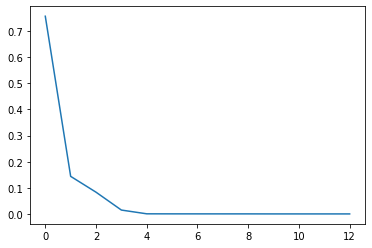

In [6]:
n_components = min(X_train.shape)
n_components = min(X_train.shape)
pca =  PCA(n_components=n_components)
pca.fit(X_train)
sns.lineplot(data=pca.explained_variance_ratio_)

Если верить PCA, то самые важные фичи - это 1-5. Думаю, что сначала можно попробовать получить скоры на полных данных, а затем на трансформированных

In [7]:
pca_pipe = Pipeline([('norm', Normalizer()), ('pca',PCA(n_components=5))])
new_X_train = pca_pipe.fit_transform(X_train)
new_X_val = pca_pipe.transform(X_val)

In [8]:
"""сформируем пайплайн"""
gauss = GaussianNB()
random_forest = RandomForestClassifier()
xgboost = XGBClassifier(use_label_encoder=False)
gauss_pipe = Pipeline([('norm', Normalizer()), ('gaussnb', gauss)])
random_forest_pipe = Pipeline([('norm', Normalizer()), ('random_forest', random_forest)])
xgboost_pipe = Pipeline([('norm', Normalizer()), ('random_forest', xgboost)])
gauss_pipe.fit(X_train, y_train)
random_forest_pipe.fit(X_train, y_train)
xgboost_pipe.fit(X_train, y_train)
print(f'gauss score: {gauss_pipe.score(X_val, y_val)}')
print(f'random forest score: {random_forest_pipe.score(X_val, y_val)}')
print(f'xgboost score: {xgboost_pipe.score(X_val, y_val)}')

[14:40:21] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
gauss score: 0.9
random forest score: 0.8
xgboost score: 0.8


In [9]:
gauss_pipe.fit(X_train, y_train)
random_forest_pipe.fit(X_train, y_train)
xgboost_pipe.fit(X_train, y_train)
print(f'gauss score: {gauss_pipe.score(X_val, y_val)}')
print(f'random forest score: {random_forest_pipe.score(X_val, y_val)}')
print(f'xgboost score: {xgboost_pipe.score(X_val, y_val)}')

[14:40:21] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
gauss score: 0.9
random forest score: 0.8666666666666667
xgboost score: 0.8


In [10]:
gauss_pipe.fit(new_X_train, y_train)
random_forest_pipe.fit(new_X_train, y_train)
xgboost_pipe.fit(new_X_train, y_train)
print(f'gauss score: {gauss_pipe.score(new_X_val, y_val)}')
print(f'random forest score: {random_forest_pipe.score(new_X_val, y_val)}')
print(f'xgboost score: {xgboost_pipe.score(new_X_val, y_val)}')

[14:40:21] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
gauss score: 0.8166666666666667
random forest score: 0.7666666666666667
xgboost score: 0.7666666666666667


К сожалению, в данном случае моя попытка оказалось неправильной. Без применения PCA скор лучше